# Table of Contents <a id='back'></a>

* [1.Initiation](#inicio) 
    * [1.1 Loading and exploring the data](#carrega)
    * [1.2 Identifying the top 10 neighbourhoods in terms of destinations](#top10)
    * [1.3 Graphics](#charts)
         * [1.3.1 Graph for Taxi Company and number of rides](#top_empresa)
         * [1.3.2 Graph to evaluate Top 10 neighbourhoods by number of runs](#top_bairro)
    * [1.4 Testing Hypotheses](#hipoteses)   
* [2.Conclusion](#final) 

# Analyse preferences of taxi users in variable climatic conditions

In this project we will analyse the preference of taxi users and companies, identify the most popular destinations per trip and analyse the impact of climatic factors on the duration of trips.

# 1. Initiation <a id='inicio'></a>

In [28]:
#Loading all the libraries that may be needed

import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
from scipy import stats as st
import seaborn as sns

# 1.1 Loading and exploring the data <a id='carrega'></a>

In this topic we will load and study the data, we will also check if the types of data are correct.

In [29]:
df1 = pd.read_csv('/Users/andrewferreira/Downloads/moved_project_sql_result_01 (1).csv')
df1.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [31]:
df1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [32]:
df2 = pd.read_csv('/Users/andrewferreira/Downloads/moved_project_sql_result_04 (1).csv')
df2.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [34]:
df2.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [35]:
df3 = pd.read_csv('/Users/andrewferreira/Downloads/moved_project_sql_result_07 (1).csv')
df3.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [37]:
df3.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


After loading the available libraries, and as the data were previously treated, we found that in none of the tables there are null values, the formatting of our index does not deserve any error to point out, the types of data for our study are also all correct. The only detail is in our df2 table where the average of trips contains many decimal places, and as there is no half trip, for example, I will round up the number of trips to facilitate their representation.

[Back to the Index](#back)

# 1.2 Identifying the top 10 neighbourhoods in terms of destinations  <a id='top10'></a>

In this topic we will check which are the top 10 neighbourhoods in terms of destinations, for this I will sort the df2 table in descending order. As mentioned earlier, I will round the 'average_trips' column to facilitate its representation.

In [38]:
#Sorting the table in descending order
df2 = df2.sort_values('average_trips', ascending=False)
df2.head(11)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [39]:
#Rounding the number of trips
df2['average_trips'] = df2['average_trips'].round()
df2.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.0
1,River North,9524.0
2,Streeterville,6665.0
3,West Loop,5164.0
4,O'Hare,2547.0
5,Lake View,2421.0
6,Grant Park,2069.0
7,Museum Campus,1510.0
8,Gold Coast,1364.0
9,Sheffield & DePaul,1260.0


At first glance our df2 table already seems to be ordered in descending order, but in order not to have to go through our entire table and run the risk of 'failing' a value that was not ordered we played for sure and ordered our table in descending order.

The top 10 neighbourhoods in terms of destination are:

- Loop :10727 trips

- River North :9524 trips

- Streeterville :6665 trips

- West Loop :5164 trips

- O'Hare :2547 trips

- Lake View :2421 trips

- Grant Park :2069 trips

- Museum Campus :1510 trips

- Gold Coast: 1364 trips

- Sheffield & DePaul :1260 trips

[Back to the Index](#back)

# 1.3 Graphics  <a id='charts'></a>

In this topic we will make two graphs, one to analyse the number of trips per taxi company and in a second instance we will analyse the top 10 number of runs per neighbourhood. In the first study I will filter only the 5 companies with the highest number of races, for this I will sort the table data in descending order.

# 1.3.1 Graph for Taxi Company and number of rides  <a id='top_empresa'></a>

In [40]:
df1 = df1.sort_values('trips_amount', ascending=False)
df1.head(5)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


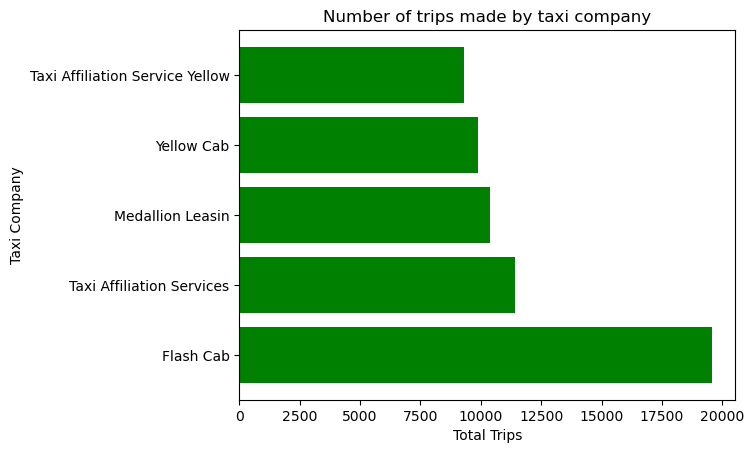

In [41]:
plt.barh(df1.head(5)['company_name'], df1.head(5)['trips_amount'], color=['green'])
plt.title('Number of trips made by taxi company')
plt.xlabel('Total Trips')
plt.ylabel('Taxi Company')

plt.show()

To generate this graph I only studied the 5 taxi companies with the most trips.

After making the graph it is much more noticeable than:

- The company Flash Cab leads by a large margin in relation to the rest of the competition.

- The other 4 companies get very approximate values.

This information can be important to better understand the taxi market and how to identify possible opportunities for competing companies.

# 1.3.2 Graph to evaluate Top 10 neighbourhoods by number of runs  <a id='top_bairro'></a>

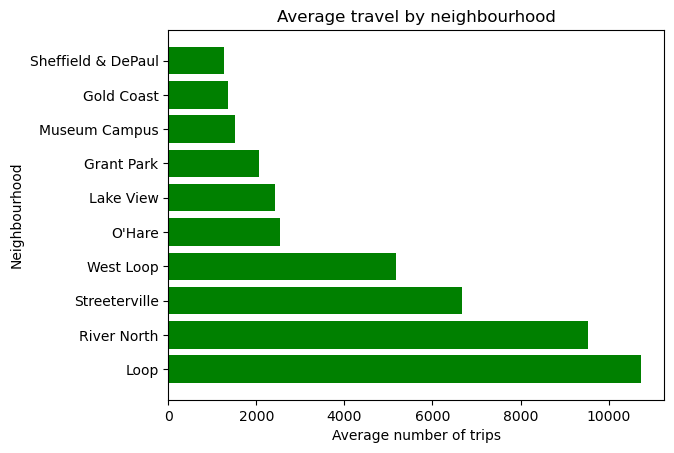

In [42]:
plt.barh(df2.head(10)['dropoff_location_name'], df2.head(10)['average_trips'], color=['green'])
plt.title('Average travel by neighbourhood')
plt.xlabel('Average number of trips')
plt.ylabel('Neighbourhood')

plt.show()

A little like in the previous study I identified the top 10 neighbourhoods per race, in this case the data had already been ordered previously.

Through the graph I could conclude that :

- The Loop neighbourhood leads although River North is also very popular. It is possible that these neighbourhoods have characteristics that make them so busy in relation to other neighbourhoods in the city.

Some of the reasons for this popularity may be done to several factors:

- Population density

- Stores and commercial establishments

- Leisure areas

- Large number of restaurants and nightlife venues

All these factors can have a significant impact on the flow of trips by neighbourhood.

[Back to the Index](#back)

# 1.4 Testing Hypotheses  <a id='hipoteses'></a>

After the data analysis is completed, we will test hypotheses now. Through our dataframe df3 we will test "The average duration of Loop tours to O'Hare International Airport changes on rainy Saturdays."

- Hypothesis null: The average duration of the Loop tours to O'Hare International Airport does not change on rainy Saturdays.

- Alternative hypothesis: The average duration of Loop tours to O'Hare International Airport changes on rainy Saturdays.

In [43]:
alpha = 0.05
sample_1 = df3[df3['weather_conditions'].str.contains('Bad')]
sample_2 = df3[df3['weather_conditions'].str.contains('Good')]
results = st.ttest_ind(sample_1['duration_seconds'], sample_2['duration_seconds'], equal_var=False)


if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")
    
print('p-value:', results.pvalue)

We reject the null hypothesis
p-value: 6.738994326108734e-12


Based on our study, the null hypothesis was rejected, which means that there is significant evidence to support the alternative hypothesis, that is, rain influences Loop's trips to the airport on rainy Saturdays.

[Back to the Index](#back)

# 2. Conclusion  <a id='final'></a>

In this project we had the task of finding patterns to understand the preferences of passengers and the impact of external factors on taxi rides.

- In a first instance we loaded the libraries and explored the data, we verified that the data were all in order and that it would not be necessary to fill in possible missing values. We only rounded the average number of trips in table df2.

- We identified the top 10 neighbourhoods in terms of destination: Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul are the most popular neighbourhoods. We discussed that this popularity could be influenced by several factors such as population density, laser areas, number of restaurants and number of shops and commerce.

- We checked which taxi companies made the most runs, Flash Cab led by a large number of trips. The other 4 companies that completed the top 5 (Taxi Affiliation Services, Medallion Leasin, Yellow Cab, Taxi Affiliation Service Yellow) all had a very approximate total of trips.

- Finally, we tested the hypothesis that consisted of verifying that the average duration of the Loop tours to O'Hara International Airport on Saturdays was influenced by rain.

With this data analysis it was possible to verify patterns and identify factors that influence the preference of passengers and the impact that external factors have on taxi rides.

This study may be important to improve the efficiency of taxi services and to better understand the preference of passengers.





